In [ ]:
'''
/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv

'''

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Frequency')

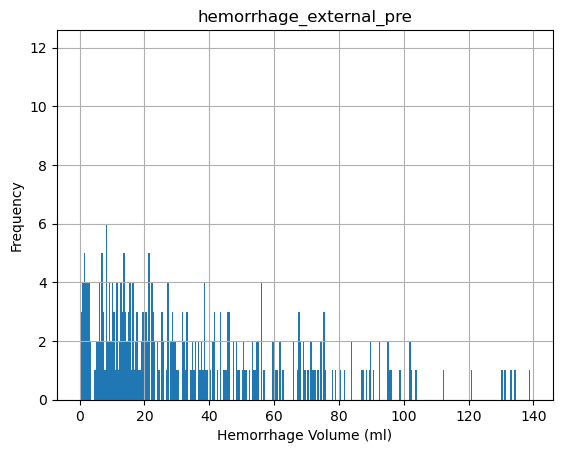

In [10]:
file_name = "/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv"
file = pd.read_csv(file_name)
file['volume(ml)'].hist(bins=len(file))
plt.title(f'{file_name.split("/")[-1].split(".")[0]}')
# Add labels to the axes (optional)
plt.xlabel('Hemorrhage Volume (ml)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

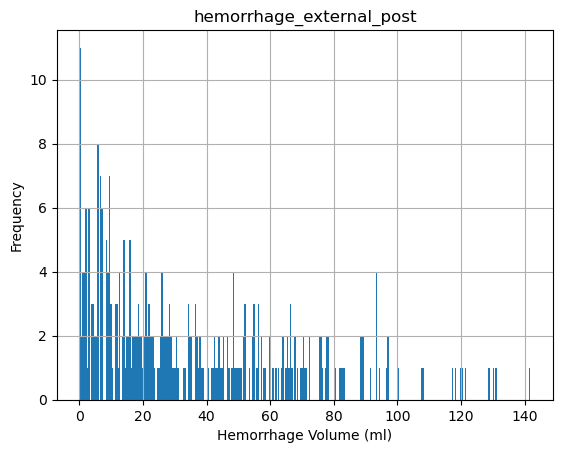

In [11]:
file_name = "/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv"
file = pd.read_csv(file_name)
file['volume(ml)'].hist(bins=len(file))
plt.title(f'{file_name.split("/")[-1].split(".")[0]}')
# Add labels to the axes (optional)
plt.xlabel('Hemorrhage Volume (ml)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

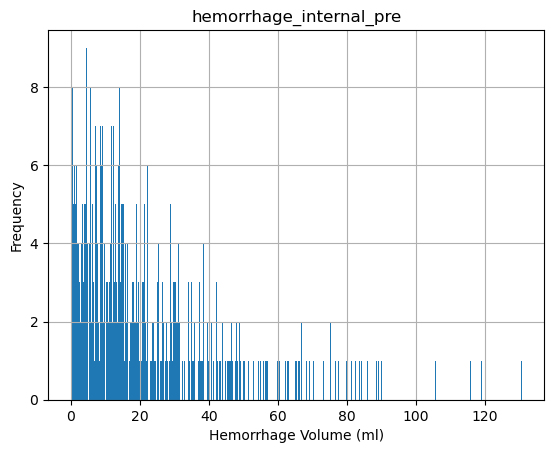

In [12]:
file_name = "/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv"
file = pd.read_csv(file_name)
file['volume(ml)'].hist(bins=len(file))
plt.title(f'{file_name.split("/")[-1].split(".")[0]}')
# Add labels to the axes (optional)
plt.xlabel('Hemorrhage Volume (ml)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

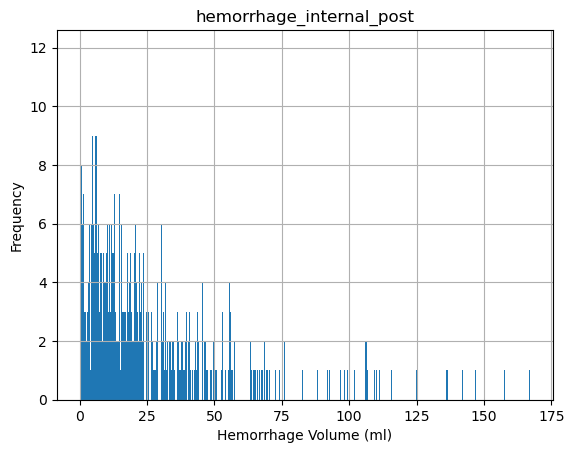

In [13]:
file_name = "/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv"
file = pd.read_csv(file_name)
file['volume(ml)'].hist(bins=len(file))
plt.title(f'{file_name.split("/")[-1].split(".")[0]}')
# Add labels to the axes (optional)
plt.xlabel('Hemorrhage Volume (ml)')
plt.ylabel('Frequency')

In [ ]:
'''
/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv

'''

In [39]:
ex_pre = pd.read_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv")
ex_post = pd.read_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv")

ex_pre = ex_pre[['pid', 'volume(ml)']]
ex_post = ex_post[['pid', 'volume(ml)']]

ex_pre.rename(columns={'volume(ml)': 'ex_pre_vol(ml)'}, inplace=True)
ex_post.rename(columns={'volume(ml)': 'ex_post_vol(ml)'}, inplace=True)

ex_pre['pid'] = ex_pre['pid'].apply(lambda x: x[:-2] if isinstance(x, str) else x)
ex_post['pid'] = ex_post['pid'].apply(lambda x: x[:-2] if isinstance(x, str) else x)

ex_pre.set_index('pid', inplace=True)
ex_post.set_index('pid', inplace=True)

ex = pd.merge(ex_pre, ex_post, on='pid', how='inner')

ex['delta(ml)'] = ex['ex_post_vol(ml)'] - ex['ex_pre_vol(ml)']
ex['delta(%)'] = (ex['delta(ml)'] / ex['ex_pre_vol(ml)']) * 100
ex['HE_label'] = (ex['delta(%)'] >= 30).astype(int)

ex

,ex_pre_vol(ml),ex_post_vol(ml),delta(ml),delta(%),HE_label
pid,,,,,
01893382,80.546945,75.845578,-4.701367,-5.836804,0
00615683,71.233406,70.458344,-0.775063,-1.088060,0
01274149,0.006462,0.057812,0.051349,794.625119,1
01891080,25.265080,6.737900,-18.527180,-73.331175,0
01058047,72.770562,77.236039,4.465477,6.136378,0
...,...,...,...,...,...
01451585,1.140304,97.083203,95.942899,8413.798617,1
01695437,12.195507,77.920891,65.725384,538.931138,1
01596991,56.173227,65.500742,9.327516,16.604913,0


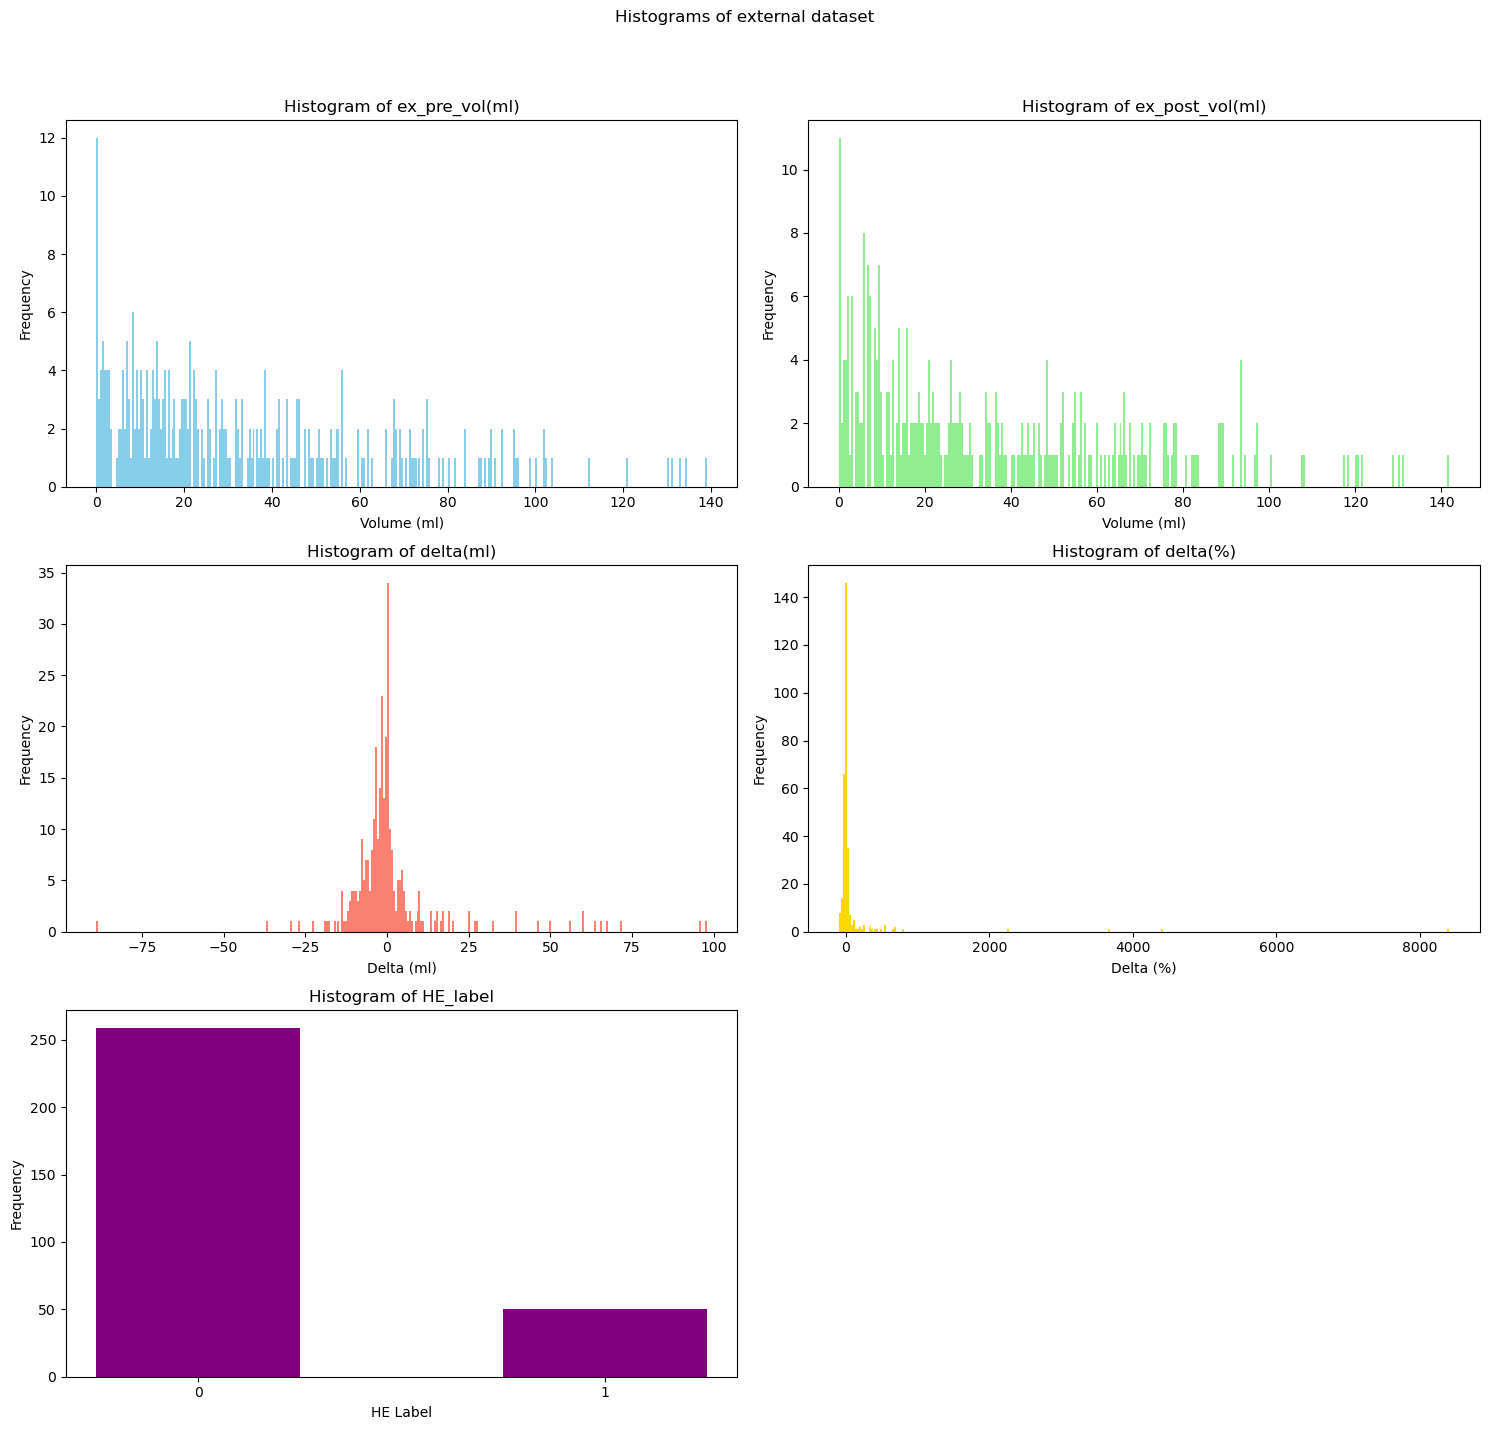

In [26]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Histograms of external dataset')

# Plot histograms
axes[0, 0].hist(ex['ex_pre_vol(ml)'], bins=len(ex), color='skyblue')
axes[0, 0].set_title('Histogram of ex_pre_vol(ml)')
axes[0, 0].set_xlabel('Volume (ml)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(ex['ex_post_vol(ml)'], bins=len(ex), color='lightgreen')
axes[0, 1].set_title('Histogram of ex_post_vol(ml)')
axes[0, 1].set_xlabel('Volume (ml)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(ex['delta(ml)'], bins=len(ex), color='salmon')
axes[1, 0].set_title('Histogram of delta(ml)')
axes[1, 0].set_xlabel('Delta (ml)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(ex['delta(%)'], bins=len(ex), color='gold')
axes[1, 1].set_title('Histogram of delta(%)')
axes[1, 1].set_xlabel('Delta (%)')
axes[1, 1].set_ylabel('Frequency')

axes[2, 0].hist(ex['HE_label'], bins=[-0.5, 0.5, 1.5], color='purple', rwidth=0.5)
axes[2, 0].set_title('Histogram of HE_label')
axes[2, 0].set_xlabel('HE Label')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xticks([0, 1])

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [ ]:
'''
/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv

'''

In [40]:
in_pre = pd.read_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv")
in_post = pd.read_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv")

in_pre = in_pre[['pid', 'volume(ml)']]
in_post = in_post[['pid', 'volume(ml)']]

in_pre.rename(columns={'volume(ml)': 'in_pre_vol(ml)'}, inplace=True)
in_post.rename(columns={'volume(ml)': 'in_post_vol(ml)'}, inplace=True)

in_pre['pid'] = in_pre['pid'].apply(lambda x: x[:-2] if isinstance(x, str) else x)
in_post['pid'] = in_post['pid'].apply(lambda x: x[:-2] if isinstance(x, str) else x)

in_pre.set_index('pid', inplace=True)
in_post.set_index('pid', inplace=True)

internal = pd.merge(in_pre, in_post, on='pid', how='inner')

internal['delta(ml)'] = internal['in_post_vol(ml)'] - internal['in_pre_vol(ml)']
internal['delta(%)'] = (internal['delta(ml)'] / internal['in_pre_vol(ml)']) * 100
internal['HE_label'] = (internal['delta(%)'] >= 30).astype(int)

internal

,in_pre_vol(ml),in_post_vol(ml),delta(ml),delta(%),HE_label
pid,,,,,
276503,13.906554,10.706017,-3.200537,-23.014596,0
331713,20.226307,12.472778,-7.753528,-38.333881,0
396171,35.901938,64.910523,29.008586,80.799500,1
445621,5.439962,5.267412,-0.172550,-3.171903,0
456603,71.520414,56.250000,-15.270414,-21.351126,0
...,...,...,...,...,...
455811,19.534068,2.188375,-17.345693,-88.797134,0
392798,5.795288,0.160400,-5.634888,-97.232227,0
515369,13.185396,12.126370,-1.059026,-8.031813,0


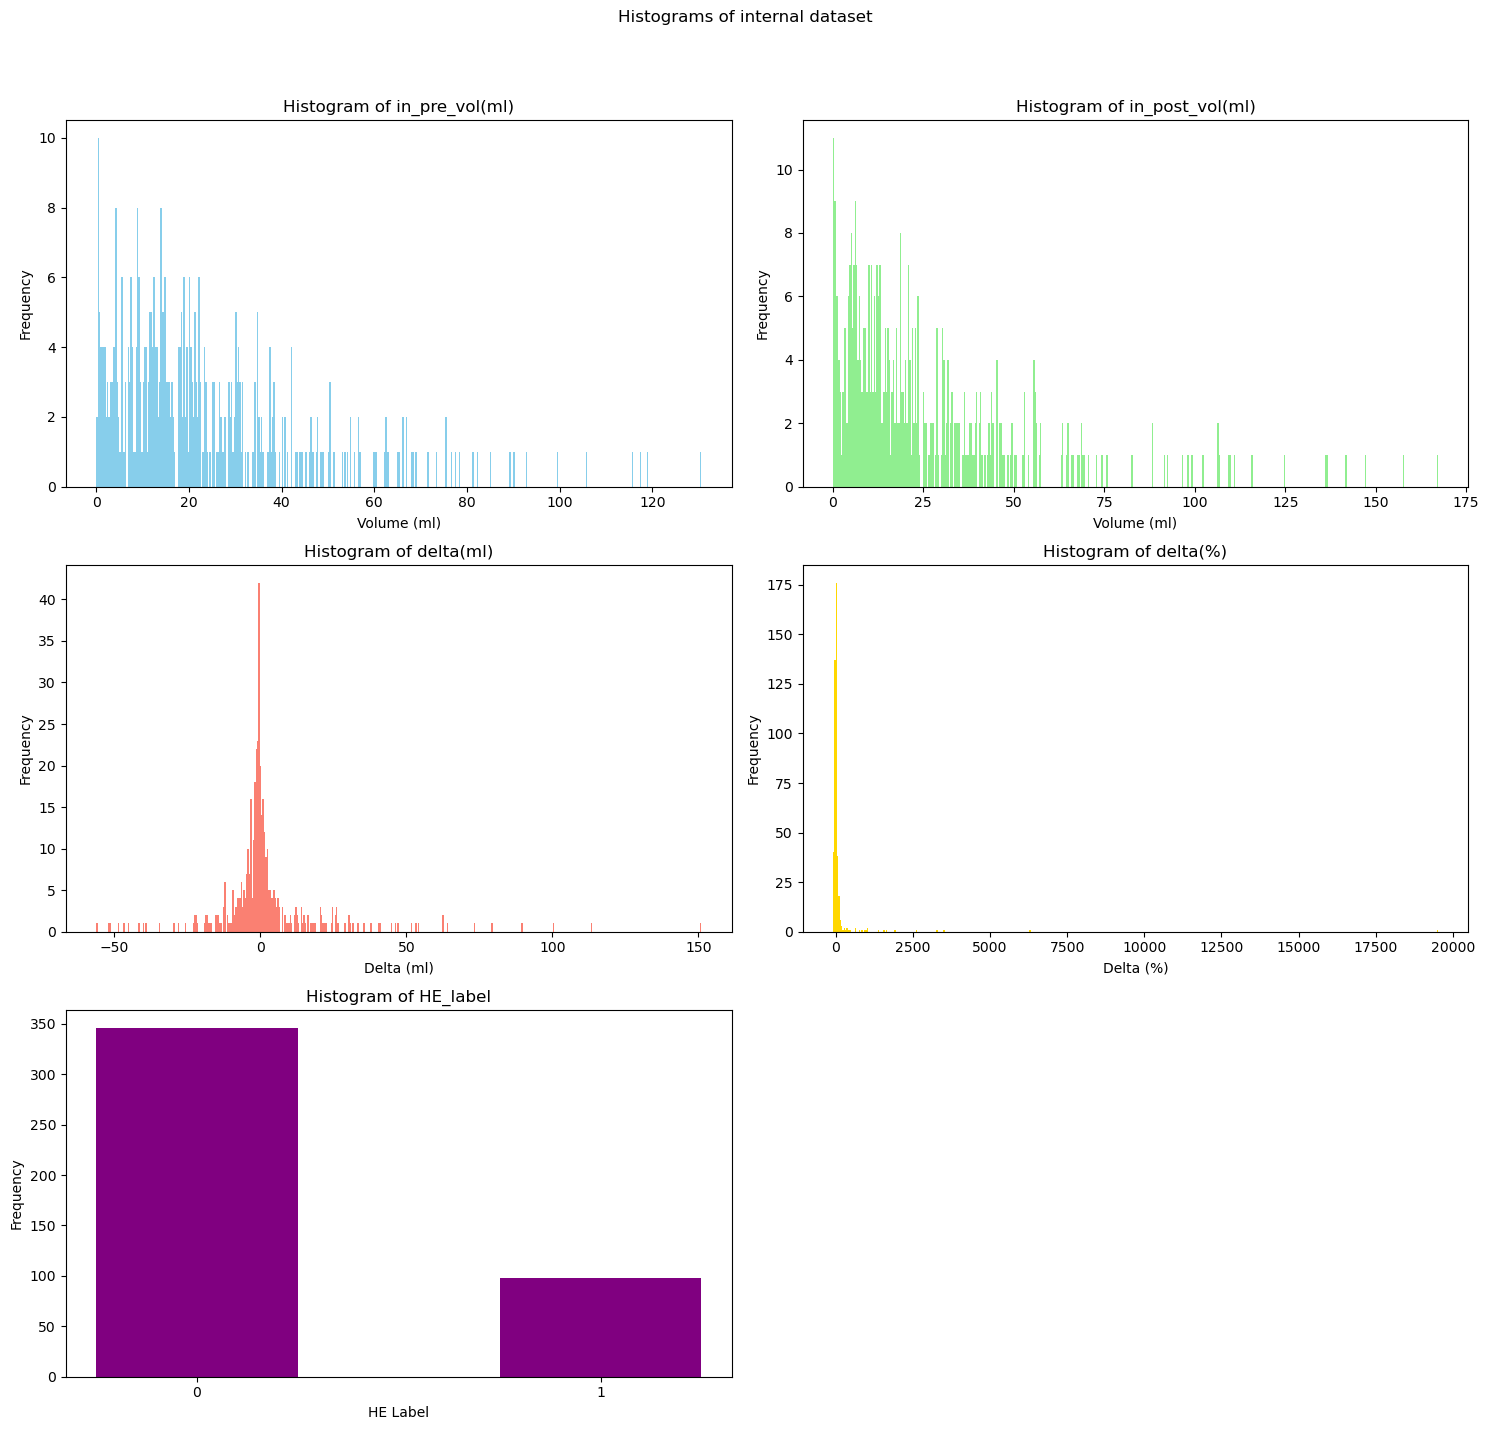

In [38]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Histograms of internal dataset')

# Plot histograms
axes[0, 0].hist(internal['in_pre_vol(ml)'], bins=len(internal), color='skyblue')
axes[0, 0].set_title('Histogram of in_pre_vol(ml)')
axes[0, 0].set_xlabel('Volume (ml)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(internal['in_post_vol(ml)'], bins=len(internal), color='lightgreen')
axes[0, 1].set_title('Histogram of in_post_vol(ml)')
axes[0, 1].set_xlabel('Volume (ml)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(internal['delta(ml)'], bins=len(internal), color='salmon')
axes[1, 0].set_title('Histogram of delta(ml)')
axes[1, 0].set_xlabel('Delta (ml)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(internal.replace([np.inf, -np.inf], np.nan).dropna()['delta(%)'], bins=len(internal), color='gold')
axes[1, 1].set_title('Histogram of delta(%)')
axes[1, 1].set_xlabel('Delta (%)')
axes[1, 1].set_ylabel('Frequency')

axes[2, 0].hist(internal['HE_label'], bins=[-0.5, 0.5, 1.5], color='purple', rwidth=0.5)
axes[2, 0].set_title('Histogram of HE_label')
axes[2, 0].set_xlabel('HE Label')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xticks([0, 1])

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [41]:
'''
/ssd_data1/syjeong/deepbleed/hemorrhage_external_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_external_post.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_pre.csv

/ssd_data1/syjeong/deepbleed/hemorrhage_internal_post.csv

'''
ex.to_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_external.csv")
internal.to_csv("/ssd_data1/syjeong/deepbleed/hemorrhage_internal.csv")

##### segmentation mask에서 실제 데이터 크기로 나온것만 원래 데이터 이름으로 바꿔서, 데이터 폴더에 넣기

In [45]:
import os
import subprocess
dest = "/ssd_data1/syjeong/hematoma/data"
os.makedirs(os.path.join(dest, 'segMask', 'external', 'pre'), exist_ok=True)
os.makedirs(os.path.join(dest, 'segMask', 'internal', 'pre'), exist_ok=True)

In [49]:
os.listdir(os.path.join(source, subdir))

['00279827_1_prediction.nii.gz',
 '01058047_1_prediction.nii.gz',
 '01816071_1_mni_prediction.nii.gz',
 '01327459_1_prediction.nii.gz',
 '01849568_1_prediction.nii.gz',
 '01357911_1_mni_prediction.nii.gz',
 '01660300_1_mni_prediction.nii.gz',
 '01340404_1_mni_prediction.nii.gz',
 '01781029_1_prediction.nii.gz',
 '00336872_1_prediction.nii.gz',
 '01675742_1_mni_prediction.nii.gz',
 '00993572_1_mni_prediction.nii.gz',
 '00178396_1_prediction.nii.gz',
 '00125948_1_prediction.nii.gz',
 '01734609_1_prediction.nii.gz',
 '01688140_1_prediction.nii.gz',
 '01213087_1_mni_prediction.nii.gz',
 '01449835_1_prediction.nii.gz',
 '01702704_1_prediction.nii.gz',
 '01676647_1_prediction.nii.gz',
 '01888448_1_prediction.nii.gz',
 '00997629_1_prediction.nii.gz',
 '01635220_1_1_prediction.nii.gz',
 '01552186_1_prediction.nii.gz',
 '01524556_1_mni_prediction.nii.gz',
 '01549784_1_prediction.nii.gz',
 '01877232_1_prediction.nii.gz',
 '00240533_1_prediction.nii.gz',
 '00175572_1_prediction.nii.gz',
 '0189040

In [51]:
source = "/ssd_data1/syjeong/deepbleed/segMask"
subdir = "external/pre"
for data in os.listdir(os.path.join(source, subdir)):
    if 'mni' not in data:
        subprocess.run(['cp', f'{os.path.join(source, subdir, data)}', f'{os.path.join(dest, "segMask", subdir, "".join(data.split("_prediction")))}'])


In [52]:
subdir = "internal/pre"
for data in os.listdir(os.path.join(source, subdir)):
    if 'mni' not in data:
        subprocess.run(['cp', f'{os.path.join(source, subdir, data)}', f'{os.path.join(dest, "segMask", subdir, "".join(data.split("_prediction")))}'])


##### segmentation mask 생성된것 기준으로 labeling된것 external ehr csv에넣기.

In [58]:
# yielded = pd.read_csv('/ssd_data1/syjeong/deepbleed/hemorrhage_external.csv')
# ex_ehr_csv = pd.read_csv('/ssd_data1/syjeong/hematoma/data/EHR/ehr_brm.csv')

# original = ex_ehr_csv['label']

# ex_ehr_csv['label'] = yielded['HE_label']

# ex_ehr_csv.to_csv('/ssd_data1/syjeong/hematoma/data/EHR/ehr_brm.csv')

In [57]:
# # smchou data와 달라진 label 갯수
# sum(original != ex_ehr_csv['label'])
# 112개

112